## Mother Machine Cluster Code

In [1]:
import trenchripper as tr

/home/de64/anaconda3/envs/mothermachine/lib/python3.6/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#### Optionally transfer files into the scratch folder

In [3]:
sourcedir = "/n/files/SysBio/PAULSSON\ LAB/Daniel/Image_Data/Bacillus_Project/2019-06-18_DE85_training_data"
targetdir = "/n/scratch2/de64/2019-06-18_DE85_training_data"
tr.cluster.transferjob(sourcedir,targetdir)

Submitted batch job 42546766


#### Start Dask

In [ ]:
# kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='2GB')
dask_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
dask_controller.startdask()
dask_controller.daskcluster.start_workers()

In [ ]:
dask_controller.daskclient

#### Perform Extraction

In [8]:
# hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/full_pipeline_test/40x_Ph2_Test_1.5.nd2","/n/scratch2/de64/full_pipeline_test")
hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen/Main_Experiment.nd2","/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen")

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/nd2reader/common_raw_metadata.py:94: RuntimeWarning: Reported average frame interval (720045.2 ms) doesn't match the set interval (720000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


In [9]:
hdf5_extractor.fov_metadata[:5]

,fov,t,x,y,z
0,0,1.292015,6612.7,-3658.4,5306.100
1,0,723.546719,6615.7,-3658.7,5306.400
2,0,1443.559055,6615.8,-3658.6,5305.950
3,0,2163.541727,6615.9,-3658.6,5305.825
4,0,2883.490247,6615.9,-3658.6,5305.950


In [10]:
print(hdf5_extractor.exp_metadata['fields_of_view'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [11]:
fov_list = list(range(0,40))

In [12]:
hdf5_extractor.writemetadata()

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is a Python keyword: 'global'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [13]:
dask_controller.mapfovs(hdf5_extractor.extract_fov,fov_list)

In [9]:
hdf5_extractor.extract_fov(4)

#### Generate Kymographs

To begin, you should test which parameters work best on your dataset in the following [notebook](./Interactive_Kymograph.ipynb).

#### Start Dask

In [8]:
dask_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
dask_controller.startdask()
dask_controller.daskcluster.start_workers()

/home/de64/anaconda3/envs/mothermachine/lib/python3.6/site-packages/distributed/deploy/local.py:138: UserWarning: diagnostics_port has been deprecated. Please use `dashboard_address=` instead
  "diagnostics_port has been deprecated. "


In [9]:
dask_controller.daskclient

Client Scheduler: tcp://10.120.17.16:34123 Dashboard: http://10.120.17.16:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [22]:
# headpath = "/n/scratch2/de64/full_pipeline_test"
# all_channels = ["channel_RFP","channel_BF"]

# kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=270,padding_y=20,trench_width_x=25,\
#                  t_chunk=100,t_range=(0,-1),y_percentile=88,y_min_edge_dist=50,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.6,\
#                  expected_num_rows=2,orientation_detection=0,orientation_on_fail=0,x_percentile=85,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.3,\
#                  trench_present_thr=0.7)

headpath = "/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen/"
all_channels = ["channel_GFP","channel_Phase"]

kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=250,padding_y=40,trench_width_x=23,\
                 t_chunk=100,t_range=(0,None),y_percentile=88,y_min_edge_dist=80,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.05,\
                 expected_num_rows=2,orientation_detection=0,orientation_on_fail=0,x_percentile=80,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),\
                otsu_nbins=50,otsu_scaling=0.5,trench_present_thr=0.7)

In [23]:
# Y Percentile 88
# Y Smoothing Kernel 17
# Triangle Trheshold Bins 50
# Triangle Threshold Scaling 1.05
# Minimum Trench Length 50
# Y Padding 20
# Trench Length 270
# Orientation Detection Method 0
# Expected Number of Rows (Manual Orientation Detection) 2
# Top Orientation when Row Drifts Out (Manual Orientation Detection) 0
# X Percentile 85
# X Background Kernel 21
# X Smoothing Kernel 9
# Otsu Trheshold Bins 50
# Otsu Threshold Scaling 0.3
# Trench Width 25
# Trench Presence Threshold 0.7

In [ ]:
kymo.dask_full_kymograph(dask_controller)

In [ ]:
kymo.kymo_report()

In [25]:
# fov_list = list(range(0,80))
# fov_list = list(range(0,40))
# dask_controller.mapfovs(kymo.generate_kymograph,fov_list,retries=1)
# kymo.generate_kymograph(30)
# kymo.collect_metadata(fov_list,use_archive=False,overwrite_archive=True)
# kymo.collect_metadata(fov_list,use_archive=True,overwrite_archive=False)
# dask_controller.mapfovs(kymo.reorg_kymographs,fov_list,retries=1)
# kymo.cleanup_kymographs()

maybe an estimate of memory usage

#### Generate Segmentation

To begin, you should test which parameters work best on your dataset in the following [notebook](./Interactive_fluo_seg.ipynb).

#### Start Dask

In [6]:
dask_controller = tr.cluster.dask_controller(walltime='01:00:00',local=False,n_workers=40,memory='1GB')
dask_controller.startdask()
dask_controller.daskcluster.start_workers()

/home/de64/anaconda3/envs/mothermachine/lib/python3.6/site-packages/distributed/deploy/local.py:138: UserWarning: diagnostics_port has been deprecated. Please use `dashboard_address=` instead
  "diagnostics_port has been deprecated. "
/home/de64/anaconda3/envs/mothermachine/lib/python3.6/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [7]:
dask_controller.daskclient

Client Scheduler: tcp://10.120.17.16:56015 Dashboard: http://10.120.17.16:38300/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [9]:
# segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/full_pipeline_test","channel_RFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=30,cell_mask_method='local',\
#                  cell_otsu_scaling=1.,local_otsu_r=15,edge_threshold_scaling=1.,threshold_step_perc=0.05,threshold_perc_num_steps=4,convex_threshold=0.8)
segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen/","channel_GFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=50,cell_mask_method='local',\
                 global_otsu_scaling=0.9,cell_otsu_scaling=0.7,local_otsu_r=11,edge_threshold_scaling=0.9,threshold_step_perc=0.05,threshold_perc_num_steps=3,convex_threshold=0.75)

In [10]:
# Scale Fluorescence? True
# Scaling Percentile: 90
# Gaussian Kernel Sigma: 0.75
# Cell Mask Thresholding Method: local
# Global Threshold Scaling: 0.9
# Cell Threshold Scaling: 0.7
# Local Otsu Radius: 11
# Edge Threshold Scaling: 0.9
# Threshold Step Percent: 0.05
# Number of Threshold Steps: 3
# Minimum Object Size: 30
# Convexity Threshold: 0.75

In [11]:
# fov_list = list(set(range(0,80))-set([77]))
fov_list = list(set(range(0,40)) - set([32, 14, 25, 26, 29]))

In [12]:
dask_controller.mapfovs(segment.generate_segmentation,fov_list)

ERROR:dask_jobqueue.core:Unknown job_id: 43285195 for worker tcp://10.120.16.242:58318


In [4]:
segment.generate_segmentation(1)

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [13]:
kymo_controller.daskclient.get_futures_error(kymo_controller.futures[1])

(<function trenchripper.cluster.dask_controller.mapfovs.<locals>.mapallfovs(fov_number, function=<bound method fluo_segmentation_cluster.generate_segmentation of <trenchripper.segment.fluo_segmentation_cluster object at 0x7fbbc7cd7550>>)>,
 (1,),
 {},
 ())

In [ ]:
kymo_handle.return_unwrap()

<KeysViewHDF5 ['1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '1119', '1120', '1121', '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131']>
<HDF5 group "/10

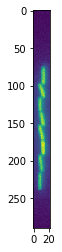

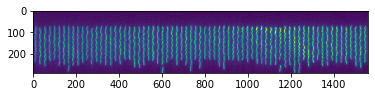

In [17]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import trenchripper as tr

kymo_handle = tr.utils.kymo_handle()

with h5py.File("/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen/kymo/kymo_12.hdf5","r") as infile:
    print(infile.keys())
    print(infile['1020'])
    kymo_handle.import_wrap(infile['1020'+'/channel_GFP'])
    plt.imshow(infile['1020'+'/channel_GFP'][:,:,0])
    plt.show()
    plt.imshow(kymo_handle.return_unwrap())
    plt.show()

<KeysViewHDF5 ['1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1110', '1111', '1112', '1113', '1114', '1115', '1116', '1117', '1118', '1119', '1120', '1121', '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131']>


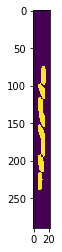

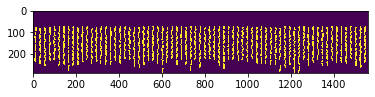

In [18]:
import h5py
from matplotlib import pyplot as plt
import numpy as np

kymo_handle = tr.utils.kymo_handle()

with h5py.File("/n/scratch2/de64/2019-05-31_Bacillus_training_data_mneongreen/segmentation/seg_12.hdf5","r") as infile:
    print(infile.keys())
    kymo_handle.import_wrap(infile['1020'])
    plt.imshow(infile['1020'][:,:,0])
    plt.show()
    plt.imshow(kymo_handle.return_unwrap())
    plt.show()

### Note
There may be an issue where hdf5 files do not close properly on crashes...

In [7]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

#### Dask Utilities

In [1]:
dask_controller.shutdown()

NameError: name 'dask_controller' is not defined

In [17]:
dask_controller.retry_failed()

Worker tcp://10.120.16.117:43008 restart in Job 43139620. This can be due to memory issue.
Worker tcp://10.120.17.99:46159 restart in Job 43139597. This can be due to memory issue.
Worker tcp://10.120.17.99:47339 restart in Job 43139596. This can be due to memory issue.
Worker tcp://10.120.16.54:36220 restart in Job 43139615. This can be due to memory issue.
Worker tcp://10.120.17.112:51330 restart in Job 43139598. This can be due to memory issue.
Worker tcp://10.120.16.49:52635 restart in Job 43139590. This can be due to memory issue.
Worker tcp://10.120.17.129:42849 restart in Job 43139600. This can be due to memory issue.
Worker tcp://10.120.17.129:52698 restart in Job 43139601. This can be due to memory issue.
Worker tcp://10.120.17.120:34163 restart in Job 43139608. This can be due to memory issue.
Worker tcp://10.120.17.120:49615 restart in Job 43139609. This can be due to memory issue.
Worker tcp://10.120.16.135:51837 restart in Job 43139621. This can be due to memory issue.
Wor

In [23]:
dask_controller.daskclient.restart()

Worker tcp://10.120.17.11:59632 restart in Job 43146383. This can be due to memory issue.
Worker tcp://10.120.17.11:46290 restart in Job 43146382. This can be due to memory issue.
Worker tcp://10.120.17.16:48879 restart in Job 43146396. This can be due to memory issue.
Worker tcp://10.120.17.107:40300 restart in Job 43146414. This can be due to memory issue.
Worker tcp://10.120.17.13:42236 restart in Job 43146385. This can be due to memory issue.
Worker tcp://10.120.16.64:56387 restart in Job 43146412. This can be due to memory issue.
Worker tcp://10.120.16.242:43511 restart in Job 43146402. This can be due to memory issue.
Worker tcp://10.120.17.16:50902 restart in Job 43146396. This can be due to memory issue.
Worker tcp://10.120.16.242:53417 restart in Job 43146394. This can be due to memory issue.
Worker tcp://10.120.16.242:51173 restart in Job 43146393. This can be due to memory issue.
Worker tcp://10.120.17.16:33178 restart in Job 43146395. This can be due to memory issue.
Worker

Client Scheduler: tcp://10.120.16.194:42145 Dashboard: http://10.120.16.194:8787/status,Cluster Workers: 41 Cores: 41 Memory: 164.00 GB


In [13]:
dask_controller.retry_processing()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Note: need to find a way to associate lanes from init barcoding snapshot with imaging lanes

plan:
- extract and segment (with phase) barcoding file
- extract and segment experiemnt file
- for both, note x positions of t=0 trenches
- compare these values to map trenches to eachother...